In [1]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os
import pathlib

import scipy.stats as ss
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
#from mlxtend.plotting import plot_learning_curves
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('BR_Filter.csv')

In [3]:
df.shape

(110952, 152)

In [4]:
df.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'weight', 'Finished', 'RecordedDate',
       'B2', 'B4', 'E5', 'ISO_3', 'country_agg', 'region_agg',
       'date_from_file', 'date', 'ISO2', 'age', 'B1_1.1', 'B1_1.2',
       'B1_1.NA', 'B1_2.1', 'B1_2.2', 'B1_2.NA', 'B1_3.1', 'B1_3.2',
       'B1_3.NA', 'B1_4.1', 'B1_4.2', 'B1_4.NA', 'B1_5.1', 'B1_5.2',
       'B1_5.NA', 'B1_6.1', 'B1_6.2', 'B1_6.NA', 'B1_7.1', 'B1_7.2',
       'B1_7.NA', 'B1_8.1', 'B1_8.2', 'B1_8.NA', 'B1_9.1', 'B1_9.2',
       'B1_9.NA', 'B1_10.1', 'B1_10.2', 'B1_10.NA', 'B1_11.1', 'B1_11.2',
       'B1_11.NA', 'B1_12.1', 'B1_12.2', 'B1_12.NA', 'B3.1', 'B3.2',
       'B3.NA', 'B5.1', 'B5.2', 'B5.NA', 'B6.1', 'B6.2', 'B6.NA', 'B7.1',
       'B7.2', 'B7.NA', 'B8.1', 'B8.2', 'B8.3', 'B8.NA', 'C0_1.1',
       'C0_1.2', 'C0_1.NA', 'C0_2.1', 'C0_2.2', 'C0_2.NA', 'C0_3.1',
       'C0_3.2', 'C0_3.NA', 'C0_4.1', 'C0_4.2', 'C0_4.NA', 'C0_5.1',
       'C0_5.2', 'C0_5.NA', 'C0_6.1', 'C0_6.2', 'C0_6.NA', 'C1_m.1',
       'C1_m.2', 'C1_m.NA',

In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,weight,Finished,RecordedDate,B2,B4,E5,ISO_3,country_agg,...,E4.5,E4.6,E4.7,E4.NA,E2.1,E2.2,E2.3,E2.NA,Cli,Cli_who
0,0,23,5261.439254,1,2020-12-01 00:19:58,3.0,NaN,4.0,BRA,Brazil,...,0,0,0,0,1,0,0,0,0,0
1,1,27,11363.454224,0,2020-12-01 04:32:13,15.0,NaN,NaN,BRA,Brazil,...,0,0,0,0,0,0,0,1,0,0
2,2,32,26895.887754,1,2020-12-01 01:09:26,4.0,NaN,3.0,BRA,Brazil,...,0,0,0,0,1,0,0,0,1,1
3,3,61,4481.196444,1,2020-12-01 00:59:22,1.0,NaN,2.0,BRA,Brazil,...,0,0,0,0,1,0,0,0,0,0
4,4,62,8999.082140,1,2020-12-01 00:43:36,10.0,12.0,3.0,BRA,Brazil,...,1,0,0,0,1,0,0,0,0,0


# Training & Test

In [6]:
X = df.drop(['Unnamed: 0','Unnamed: 0.1','B2','B4','E5','B8.1','B8.2','B8.3','B8.NA','B7.1','B7.2','B7.NA','Cli','Cli_who','weight', 'Finished', 'RecordedDate','ISO_3', 'country_agg', 'region_agg','date_from_file', 'date', 'ISO2', 'age',], axis=1)
Y = df['B8.1']

In [7]:
X.shape

(110952, 128)

In [8]:
Y.shape

(110952,)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(88761, 128)
(22191, 128)
(88761,)
(22191,)


## Decision Tree

In [11]:
max_depth = np.arange(1, 10)
min_samples_leaf = [25,50,75,100,125,150,175,200]

# GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': max_depth,'min_samples_leaf': min_samples_leaf}

In [12]:
dtree_model=tree.DecisionTreeClassifier()

dtree_model = GridSearchCV(dtree_model, param_grid,scoring='f1' ,cv=5)

dtree_model=dtree_model.fit(X_train, Y_train)
print(dtree_model.best_params_)

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 50}


In [13]:
my_model = dtree_model.best_estimator_
my_tree=my_model.fit(X_train, Y_train)

y_pred = my_model.predict(X_test)

Accuracy Score: 0.764949754404939
Area Under Curve: 0.7675540915875869
Recall score: 0.7302443133951138

Specificity: 0.8048638697800601
F1 score: 0.7687123093295495
Precision score: 0.8114585283654746
[[8307 2014]
 [3202 8668]]

              precision    recall  f1-score   support

           0       0.72      0.80      0.76     10321
           1       0.81      0.73      0.77     11870

    accuracy                           0.76     22191
   macro avg       0.77      0.77      0.76     22191
weighted avg       0.77      0.76      0.77     22191



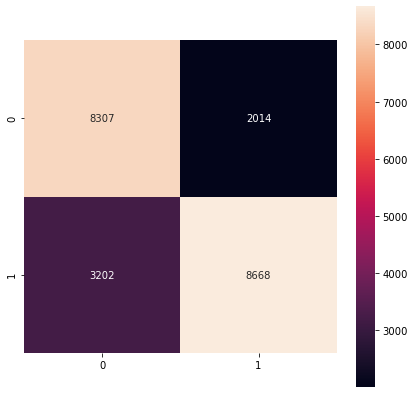

In [14]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

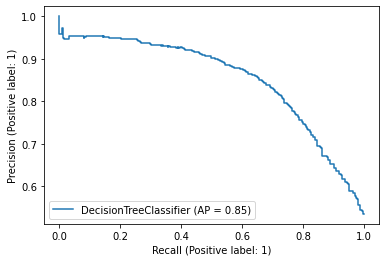

In [15]:
disp = plot_precision_recall_curve(my_model, X_test, Y_test)

In [16]:
import shap
# Need to load JS vis in the notebook
shap.initjs()

In [17]:
explainer = shap.TreeExplainer(my_model)
shap_values = explainer.shap_values(X_train)

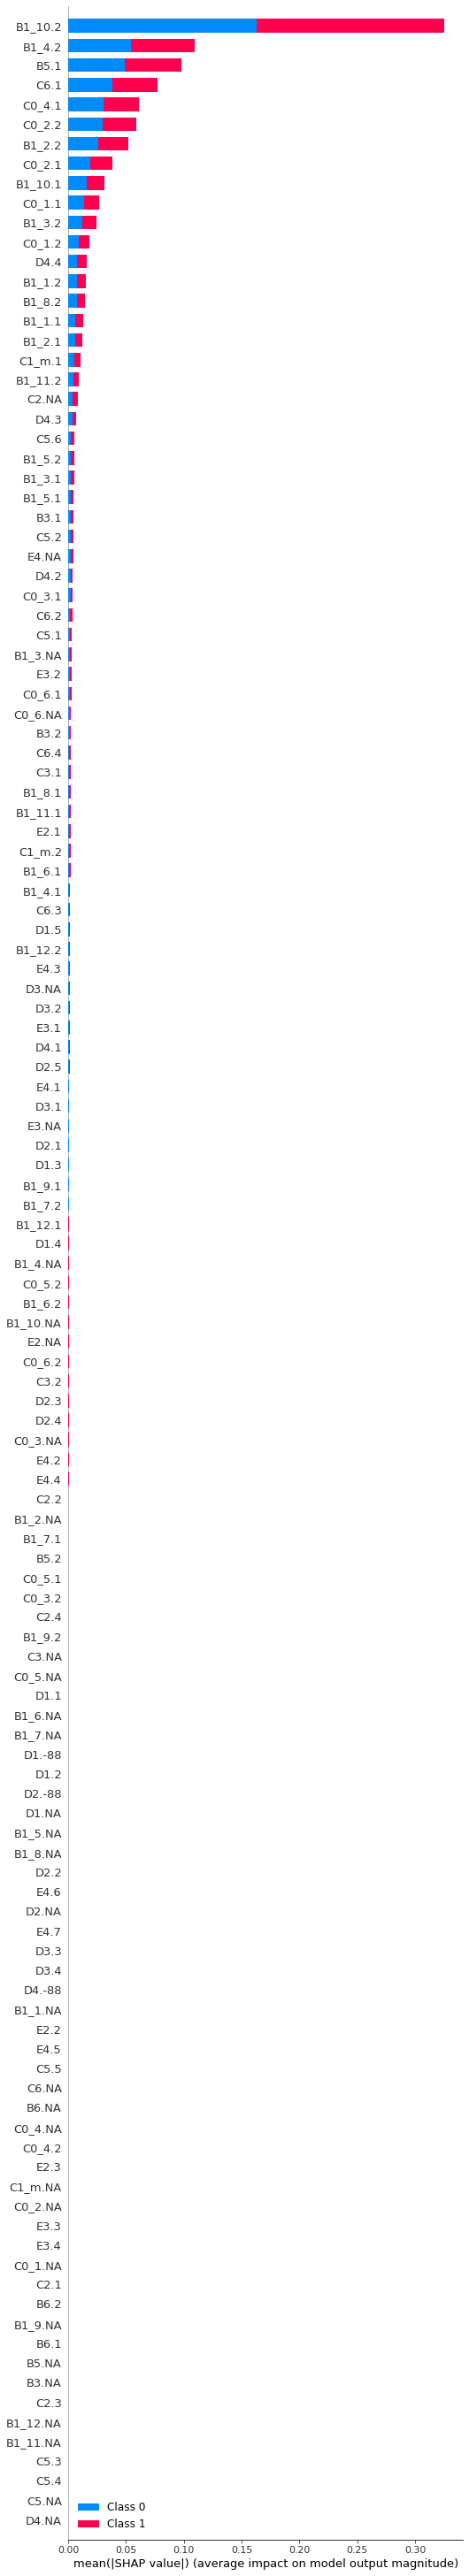

In [18]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, max_display=len(X_train.columns))

## LogisticRegression

### No weights

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy Score: 0.7739624171961607
Area Under Curve: 0.7764275476660037
Recall score: 0.741112047177759

Specificity: 0.8117430481542486
F1 score: 0.7781512605042017
Precision score: 0.8190875232774674
[[8378 1943]
 [3073 8797]]

              precision    recall  f1-score   support

           0       0.73      0.81      0.77     10321
           1       0.82      0.74      0.78     11870

    accuracy                           0.77     22191
   macro avg       0.78      0.78      0.77     22191
weighted avg       0.78      0.77      0.77     22191



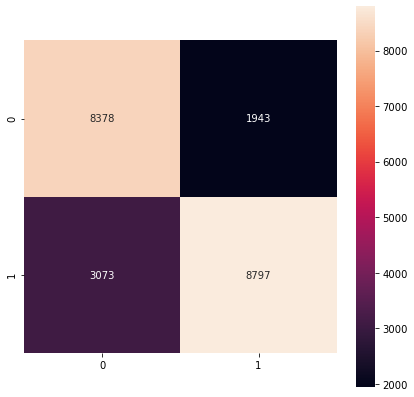

In [19]:
# define model
lg1 = LogisticRegression(random_state=2, class_weight=None)
# fit it
lg1.fit(X_train,Y_train)
# test
y_pred = lg1.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

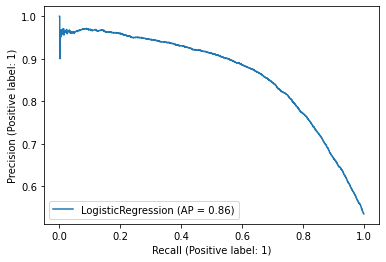

In [20]:
disp = plot_precision_recall_curve(lg1, X_test, Y_test)

## Weights. Web

In [21]:
# check the distribution
df['B8.1'].value_counts()/df.shape[0]

1    0.534249
0    0.465751
Name: B8.1, dtype: float64

In [24]:
# define class weights
w = {0:53, 1:46}
# define model
lg2 = LogisticRegression(random_state=2, class_weight=w)
# fit it
lg2.fit(X_train,Y_train)
# test
y_pred = lg2.predict(X_test)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy Score: 0.770807985219233
Area Under Curve: 0.7750278078727605
Recall score: 0.7145745577085089

Specificity: 0.8354810580370119
F1 score: 0.7693424036281179
Precision score: 0.8332023575638506
[[8623 1698]
 [3388 8482]]

              precision    recall  f1-score   support

           0       0.72      0.84      0.77     10321
           1       0.83      0.71      0.77     11870

    accuracy                           0.77     22191
   macro avg       0.78      0.78      0.77     22191
weighted avg       0.78      0.77      0.77     22191



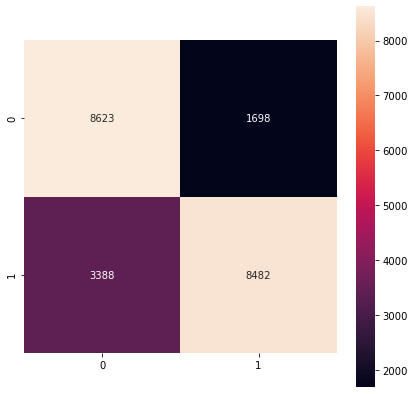

In [25]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

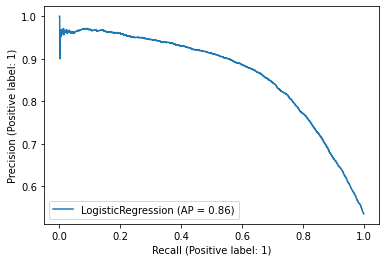

In [26]:
disp = plot_precision_recall_curve(lg2, X_test, Y_test)

## Weights. GridSearch

In [27]:
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
hyperparam_grid = {"class_weight": w }

In [28]:
# define model
lg3 = LogisticRegression(random_state=2)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="f1", cv=5, n_jobs=-1, refit=True,verbose=3)
grid.fit(X_train,Y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best score: 0.7742227280909662 with param: {'class_weight': {0: 1.0, 1: 1.0}}


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [29]:
# define model
lg3 = LogisticRegression(random_state=2, class_weight={0: 1.0, 1: 1.0})
# fit it
lg3.fit(X_train,Y_train)
# test
y_pred = lg3.predict(X_test)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy Score: 0.7739624171961607
Area Under Curve: 0.7764275476660037
Recall score: 0.741112047177759

Specificity: 0.8117430481542486
F1 score: 0.7781512605042017
Precision score: 0.8190875232774674
[[8378 1943]
 [3073 8797]]

              precision    recall  f1-score   support

           0       0.73      0.81      0.77     10321
           1       0.82      0.74      0.78     11870

    accuracy                           0.77     22191
   macro avg       0.78      0.78      0.77     22191
weighted avg       0.78      0.77      0.77     22191



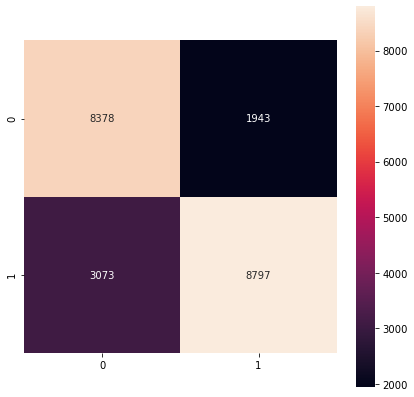

In [30]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

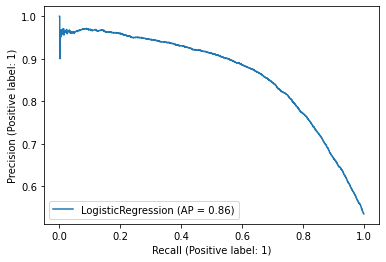

In [31]:
disp = plot_precision_recall_curve(lg3, X_test, Y_test)

## Cli & Cli_who

### Cli

In [32]:
X = df['Cli']
Y = df['B8.1']


X=X.values.reshape(-1,1)

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Accuracy Score: 0.5518904060204587
Area Under Curve: 0.5790805946309644
Recall score: 0.18955349620893008

Specificity: 0.9686076930529988
F1 score: 0.31154804763223487
Precision score: 0.8741258741258742
[[9997  324]
 [9620 2250]]

              precision    recall  f1-score   support

           0       0.51      0.97      0.67     10321
           1       0.87      0.19      0.31     11870

    accuracy                           0.55     22191
   macro avg       0.69      0.58      0.49     22191
weighted avg       0.70      0.55      0.48     22191



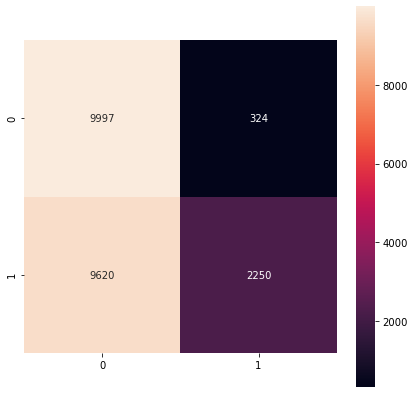

In [34]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,X_test)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, X_test)}')
print(f'Recall score: {recall_score(Y_test,X_test)}')
print("")
matrix = confusion_matrix(Y_test, X_test)
tn, fp, fn, tp = confusion_matrix(Y_test, X_test).ravel()
print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,X_test)}')
print(f'Precision score: {precision_score(Y_test,X_test)}')
print(matrix)
print("")
print(classification_report(Y_test, X_test))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

### Cli_who

In [35]:
X = df['Cli_who']
Y = df['B8.1']


X=X.values.reshape(-1,1)

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Accuracy Score: 0.5302600153215268
Area Under Curve: 0.5595885757169582
Recall score: 0.13942712721145745

Specificity: 0.979750024222459
F1 score: 0.24100771807193827
Precision score: 0.8878755364806867
[[10112   209]
 [10215  1655]]

              precision    recall  f1-score   support

           0       0.50      0.98      0.66     10321
           1       0.89      0.14      0.24     11870

    accuracy                           0.53     22191
   macro avg       0.69      0.56      0.45     22191
weighted avg       0.71      0.53      0.44     22191



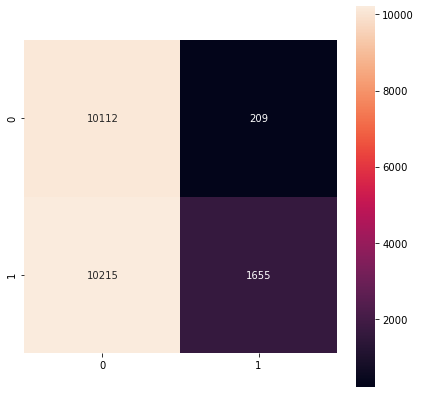

In [37]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,X_test)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, X_test)}')
print(f'Recall score: {recall_score(Y_test,X_test)}')
print("")
matrix = confusion_matrix(Y_test, X_test)
tn, fp, fn, tp = confusion_matrix(Y_test, X_test).ravel()
print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,X_test)}')
print(f'Precision score: {precision_score(Y_test,X_test)}')
print(matrix)
print("")
print(classification_report(Y_test, X_test))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Israel

In [38]:
X_israel = df[['E4.6','E3.1','E3.2','B1_2.1','B1_3.1','B1_1.1','B1_7.1','B1_12.1']]
Y_israel = df['B8.1']

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X_israel, Y_israel, test_size = 0.2, random_state=2)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(88761, 8)
(22191, 8)
(88761,)
(22191,)


In [41]:
max_depth = np.arange(1, 10)
min_samples_leaf = [25,50,75,100,125,150,175,200]

# GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': max_depth,'min_samples_leaf': min_samples_leaf}

In [42]:
dtree_model=tree.DecisionTreeClassifier()

dtree_model = GridSearchCV(dtree_model, param_grid,scoring='f1' ,cv=5)

dtree_model=dtree_model.fit(X_train, Y_train)
print(dtree_model.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 25}


In [43]:
my_model = dtree_model.best_estimator_
my_tree=my_model.fit(X_train, Y_train)

y_pred = my_model.predict(X_test)

Accuracy Score: 0.6467036185841106
Area Under Curve: 0.6444932983985752
Recall score: 0.6761583824768324

Specificity: 0.6128282143203178
F1 score: 0.6718566884312741
Precision score: 0.6676093827982033
[[6325 3996]
 [3844 8026]]

              precision    recall  f1-score   support

           0       0.62      0.61      0.62     10321
           1       0.67      0.68      0.67     11870

    accuracy                           0.65     22191
   macro avg       0.64      0.64      0.64     22191
weighted avg       0.65      0.65      0.65     22191



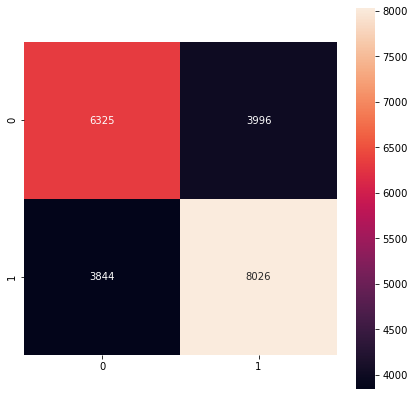

In [44]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

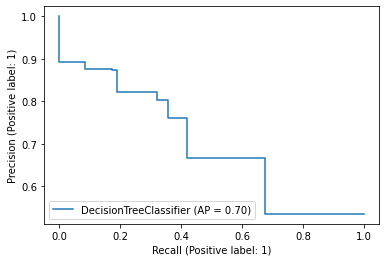

In [45]:
disp = plot_precision_recall_curve(my_model, X_test, Y_test)

In [46]:
explainer = shap.TreeExplainer(my_model)
shap_values = explainer.shap_values(X_train)

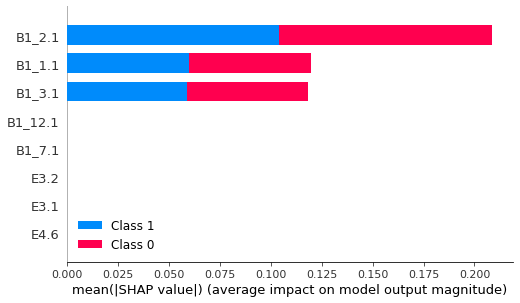

In [47]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, max_display=len(X_train.columns))

## Logistic Regression

### No weights

Accuracy Score: 0.6501284304447749
Area Under Curve: 0.6513107839857019
Recall score: 0.6343723673125526

Specificity: 0.6682492006588509
F1 score: 0.6598317560462671
Precision score: 0.6874201205039255
[[6897 3424]
 [4340 7530]]

              precision    recall  f1-score   support

           0       0.61      0.67      0.64     10321
           1       0.69      0.63      0.66     11870

    accuracy                           0.65     22191
   macro avg       0.65      0.65      0.65     22191
weighted avg       0.65      0.65      0.65     22191



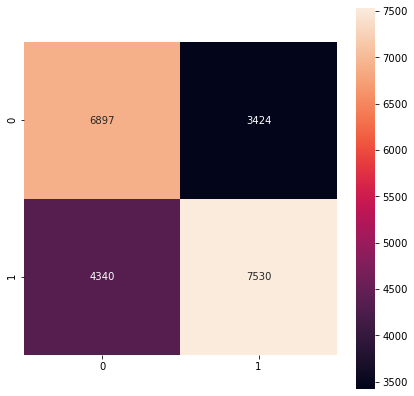

In [48]:
# define model
lg1 = LogisticRegression(random_state=2, class_weight=None)
# fit it
lg1.fit(X_train,Y_train)
# test
y_pred = lg1.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

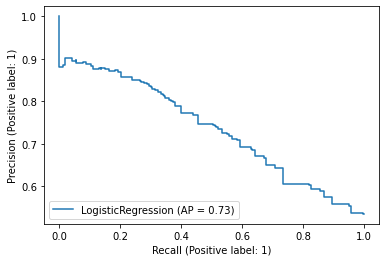

In [49]:
disp = plot_precision_recall_curve(lg1, X_test, Y_test)

### Weights. Web

In [54]:
# define class weights
w = {0:53, 1:46}
# define model
lg2 = LogisticRegression(random_state=2, class_weight=w)
# fit it
lg2.fit(X_train,Y_train)
# test
y_pred = lg2.predict(X_test)

Accuracy Score: 0.6516155198053265
Area Under Curve: 0.6560830696071439
Recall score: 0.5920808761583825

Specificity: 0.7200852630559055
F1 score: 0.6451553678799284
Precision score: 0.7086820611071897
[[7432 2889]
 [4842 7028]]

              precision    recall  f1-score   support

           0       0.61      0.72      0.66     10321
           1       0.71      0.59      0.65     11870

    accuracy                           0.65     22191
   macro avg       0.66      0.66      0.65     22191
weighted avg       0.66      0.65      0.65     22191



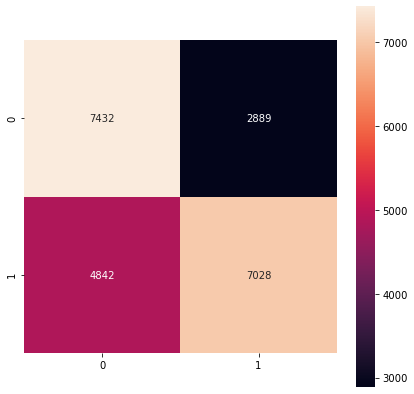

In [55]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

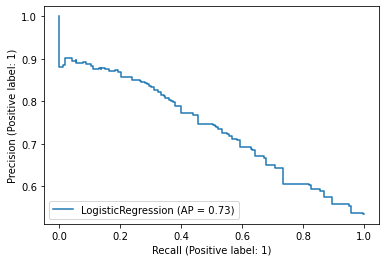

In [56]:
disp = plot_precision_recall_curve(lg2, X_test, Y_test)

### Weights. GridSearch

In [57]:
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
hyperparam_grid = {"class_weight": w }

In [58]:
# define model
lg3 = LogisticRegression(random_state=2)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="f1", cv=5, n_jobs=-1, refit=True,verbose=3)
grid.fit(X_train,Y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best score: 0.6962920528785612 with param: {'class_weight': {0: 0.01, 1: 1.0}}


In [59]:
# define model
lg3 = LogisticRegression(random_state=2, class_weight={0: 0.01, 1: 1.0})
# fit it
lg3.fit(X_train,Y_train)
# test
y_pred = lg3.predict(X_test)

Accuracy Score: 0.5349015366590059
Area Under Curve: 0.5
Recall score: 1.0

Specificity: 0.0
F1 score: 0.696984821349931
Precision score: 0.5349015366590059
[[    0 10321]
 [    0 11870]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10321
           1       0.53      1.00      0.70     11870

    accuracy                           0.53     22191
   macro avg       0.27      0.50      0.35     22191
weighted avg       0.29      0.53      0.37     22191



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


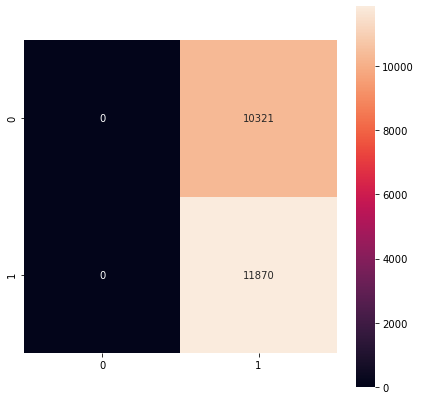

In [60]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

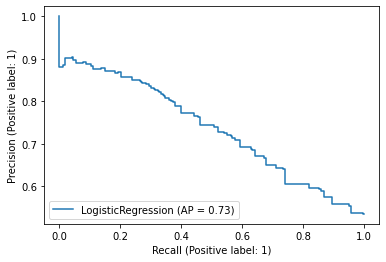

In [61]:
disp = plot_precision_recall_curve(lg3, X_test, Y_test)

## Spain

In [62]:
df.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'weight', 'Finished', 'RecordedDate',
       'B2', 'B4', 'E5', 'ISO_3', 'country_agg', 'region_agg',
       'date_from_file', 'date', 'ISO2', 'age', 'B1_1.1', 'B1_1.2',
       'B1_1.NA', 'B1_2.1', 'B1_2.2', 'B1_2.NA', 'B1_3.1', 'B1_3.2',
       'B1_3.NA', 'B1_4.1', 'B1_4.2', 'B1_4.NA', 'B1_5.1', 'B1_5.2',
       'B1_5.NA', 'B1_6.1', 'B1_6.2', 'B1_6.NA', 'B1_7.1', 'B1_7.2',
       'B1_7.NA', 'B1_8.1', 'B1_8.2', 'B1_8.NA', 'B1_9.1', 'B1_9.2',
       'B1_9.NA', 'B1_10.1', 'B1_10.2', 'B1_10.NA', 'B1_11.1', 'B1_11.2',
       'B1_11.NA', 'B1_12.1', 'B1_12.2', 'B1_12.NA', 'B3.1', 'B3.2',
       'B3.NA', 'B5.1', 'B5.2', 'B5.NA', 'B6.1', 'B6.2', 'B6.NA', 'B7.1',
       'B7.2', 'B7.NA', 'B8.1', 'B8.2', 'B8.3', 'B8.NA', 'C0_1.1',
       'C0_1.2', 'C0_1.NA', 'C0_2.1', 'C0_2.2', 'C0_2.NA', 'C0_3.1',
       'C0_3.2', 'C0_3.NA', 'C0_4.1', 'C0_4.2', 'C0_4.NA', 'C0_5.1',
       'C0_5.2', 'C0_5.NA', 'C0_6.1', 'C0_6.2', 'C0_6.NA', 'C1_m.1',
       'C1_m.2', 'C1_m.NA',

In [63]:
X_spain = df[['B1_10.1','B1_4.1','B1_2.1','B1_3.1','B1_1.1','B1_7.1','B1_12.1']]
Y_spain = df['B8.1']

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X_spain, Y_spain, test_size = 0.2, random_state=2)

In [65]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(88761, 7)
(22191, 7)
(88761,)
(22191,)


In [66]:
max_depth = np.arange(1, 10)
min_samples_leaf = [25,50,75,100,125,150,175,200]

# GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': max_depth,'min_samples_leaf': min_samples_leaf}

In [67]:
dtree_model=tree.DecisionTreeClassifier()

dtree_model = GridSearchCV(dtree_model, param_grid,scoring='f1' ,cv=5)

dtree_model=dtree_model.fit(X_train, Y_train)
print(dtree_model.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 25}


In [68]:
my_model = dtree_model.best_estimator_
my_tree=my_model.fit(X_train, Y_train)

y_pred = my_model.predict(X_test)

Accuracy Score: 0.7361993601009418
Area Under Curve: 0.7395100631155249
Recall score: 0.6920808761583824

Specificity: 0.7869392500726674
F1 score: 0.7373003051516783
Precision score: 0.7888419435375457
[[8122 2199]
 [3655 8215]]

              precision    recall  f1-score   support

           0       0.69      0.79      0.74     10321
           1       0.79      0.69      0.74     11870

    accuracy                           0.74     22191
   macro avg       0.74      0.74      0.74     22191
weighted avg       0.74      0.74      0.74     22191



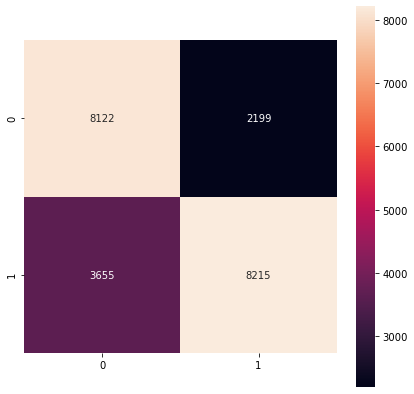

In [69]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

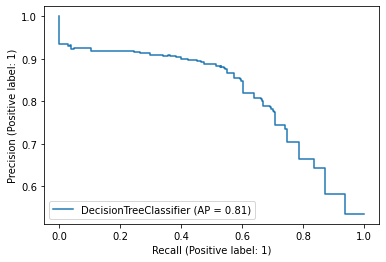

In [70]:
disp = plot_precision_recall_curve(my_model, X_test, Y_test)

In [71]:
explainer = shap.TreeExplainer(my_model)
shap_values = explainer.shap_values(X_train)

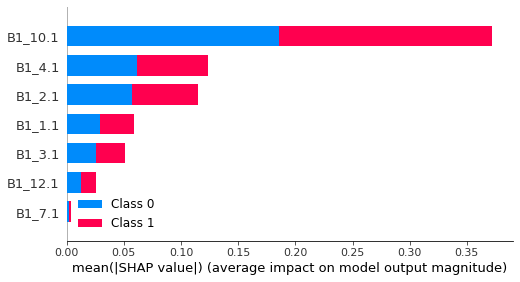

In [72]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, max_display=len(X_train.columns))

## LogisticRegression

### No weights

Accuracy Score: 0.7353882204497318
Area Under Curve: 0.7401363493852394
Recall score: 0.6721145745577085

Specificity: 0.8081581242127701
F1 score: 0.7309877221916805
Precision score: 0.8011648925487046
[[8341 1980]
 [3892 7978]]

              precision    recall  f1-score   support

           0       0.68      0.81      0.74     10321
           1       0.80      0.67      0.73     11870

    accuracy                           0.74     22191
   macro avg       0.74      0.74      0.74     22191
weighted avg       0.75      0.74      0.74     22191



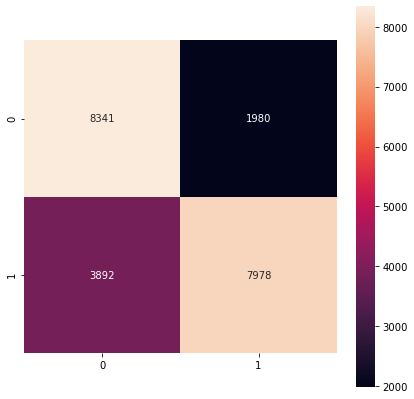

In [73]:
# define model
lg1 = LogisticRegression(random_state=2, class_weight=None)
# fit it
lg1.fit(X_train,Y_train)
# test
y_pred = lg1.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

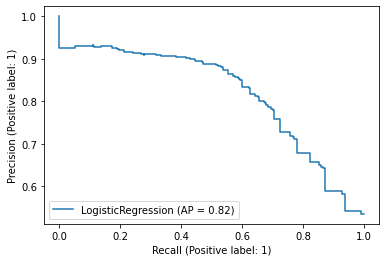

In [74]:
disp = plot_precision_recall_curve(lg1, X_test, Y_test)

### Weights. Web

In [75]:
# define class weights
w = {0:53, 1:46}
# define model
lg2 = LogisticRegression(random_state=2, class_weight=w)
# fit it
lg2.fit(X_train,Y_train)
# test
y_pred = lg2.predict(X_test)

Accuracy Score: 0.7307466991122528
Area Under Curve: 0.7389270303624341
Recall score: 0.6217354675652906

Specificity: 0.8561185931595776
F1 score: 0.7118398842536773
Precision score: 0.8324873096446701
[[8836 1485]
 [4490 7380]]

              precision    recall  f1-score   support

           0       0.66      0.86      0.75     10321
           1       0.83      0.62      0.71     11870

    accuracy                           0.73     22191
   macro avg       0.75      0.74      0.73     22191
weighted avg       0.75      0.73      0.73     22191



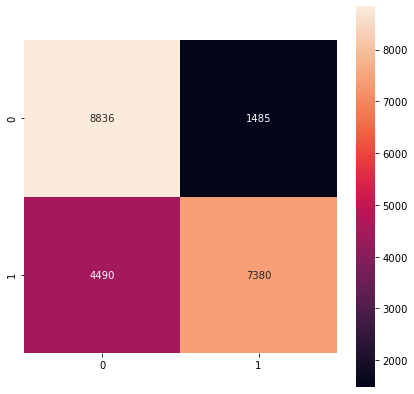

In [76]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

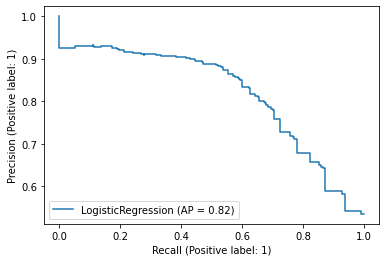

In [77]:
disp = plot_precision_recall_curve(lg2, X_test, Y_test)

### Weights. GridSearch

In [78]:
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
hyperparam_grid = {"class_weight": w }

In [79]:
# define model
lg3 = LogisticRegression(random_state=2)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="f1", cv=5, n_jobs=-1, refit=True,verbose=3)
grid.fit(X_train,Y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best score: 0.7252285539501371 with param: {'class_weight': {0: 1.0, 1: 1.0}}


In [80]:
# define model
lg3 = LogisticRegression(random_state=2, class_weight={0: 1.0, 1: 1.0})
# fit it
lg3.fit(X_train,Y_train)
# test
y_pred = lg3.predict(X_test)

Accuracy Score: 0.7353882204497318
Area Under Curve: 0.7401363493852394
Recall score: 0.6721145745577085

Specificity: 0.8081581242127701
F1 score: 0.7309877221916805
Precision score: 0.8011648925487046
[[8341 1980]
 [3892 7978]]

              precision    recall  f1-score   support

           0       0.68      0.81      0.74     10321
           1       0.80      0.67      0.73     11870

    accuracy                           0.74     22191
   macro avg       0.74      0.74      0.74     22191
weighted avg       0.75      0.74      0.74     22191



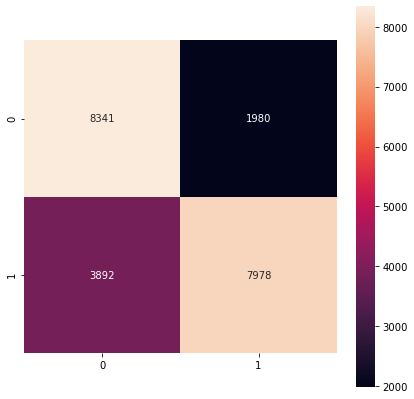

In [81]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

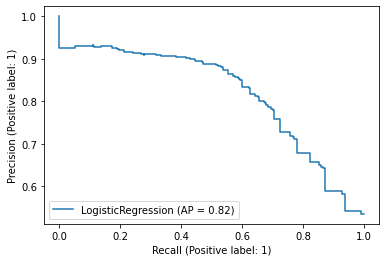

In [82]:
disp = plot_precision_recall_curve(lg3, X_test, Y_test)